In [3]:
# Importing modules for use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the plotting DPI settings to be a bit higher
plt.rcParams['figure.figsize'] = [7.0, 4.5]
plt.rcParams['figure.dpi'] = 150

In [5]:
# Load the CSV Data

data = pd.read_csv('/Users/semani/Documents/Code/AIInvestor/Data/Altman_Z_2d.csv')
data.head(5)

,Bankrupt,EBIT/Total Assets,MktValEquity/Debt
0,False,27.693875,8.415582
1,False,-14.302305,8.878080
2,True,-20.515623,-8.742365
3,False,29.729424,4.878042
4,False,32.856383,1.107730


<AxesSubplot:xlabel='EBIT/Total Assets', ylabel='MktValEquity/Debt'>

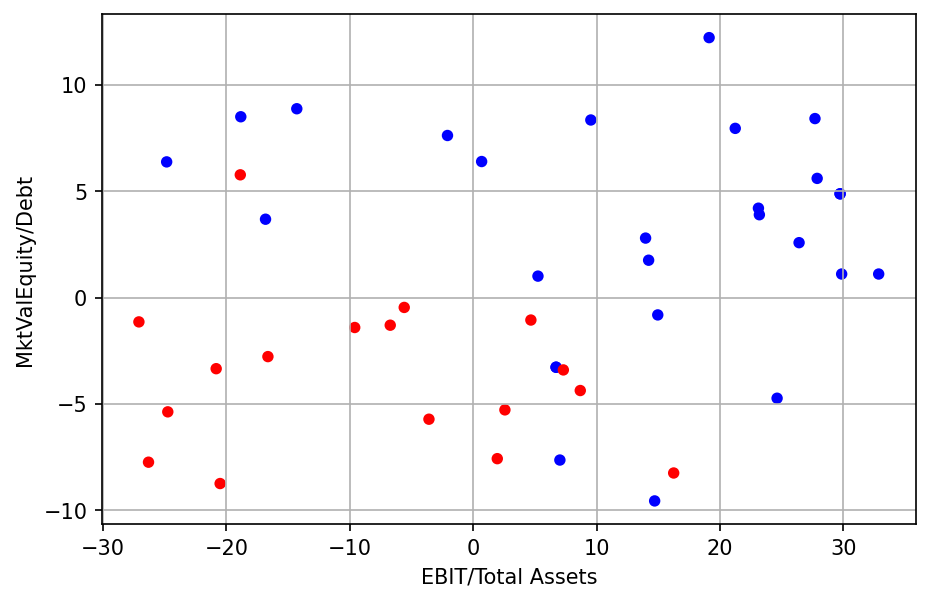

In [7]:
# Scatter plot to visualize bankruptcy data

colours = np.where(data['Bankrupt'], 'r', 'b') # here we define separate colours for True and False
data.plot.scatter(x='EBIT/Total Assets', y='MktValEquity/Debt', c = colours, grid='on')

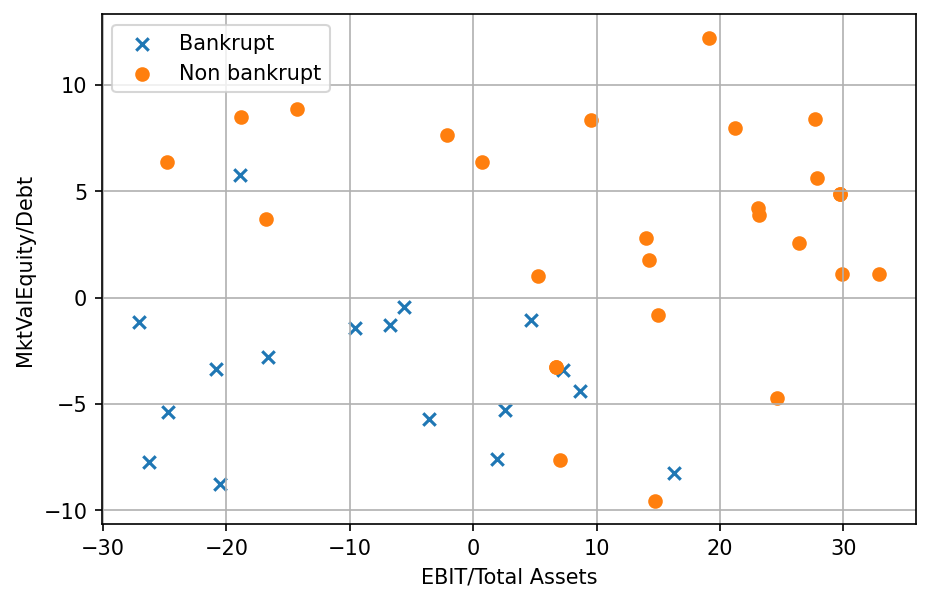

In [8]:
# Let's try plotting the above with different markers
# Bankruptcy mask (list of booleans)
bankrupt_mask = data['Bankrupt']==True

# Plot the bankrupt points
plt.scatter(data['EBIT/Total Assets'][bankrupt_mask], data['MktValEquity/Debt'][bankrupt_mask], marker='x')

# Plot the non-bankrupt points
plt.scatter(data['EBIT/Total Assets'][~bankrupt_mask], data['MktValEquity/Debt'][~bankrupt_mask], marker='o')

# Formatting
plt.xlabel('EBIT/Total Assets')
plt.ylabel('MktValEquity/Debt')
plt.grid()
plt.legend(['Bankrupt','Non bankrupt'])

In [11]:
# Split the data for the classifier to be trained

# X is data
# Y is the classification

X = data[['EBIT/Total Assets', 'MktValEquity/Debt']]
Y = data['Bankrupt']

In [12]:
# import scikitlearn
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, Y)

DecisionTreeClassifier(max_depth=2)

In [13]:
# Let's see if it predicts bankruptcy for a bad company
print('Low EBIT/Total Assets and MktValEquity/Debt company go bust?', tree_clf.predict([[-20, -10]]))

# Let's try this for a highly values, high earning company
print('High EBIT/Total Assets and MktValEquity/Debt company go bust?', tree_clf.predict([[20, 10]]))

Low EBIT/Total Assets and MktValEquity/Debt company go bust? [ True]
High EBIT/Total Assets and MktValEquity/Debt company go bust? [False]


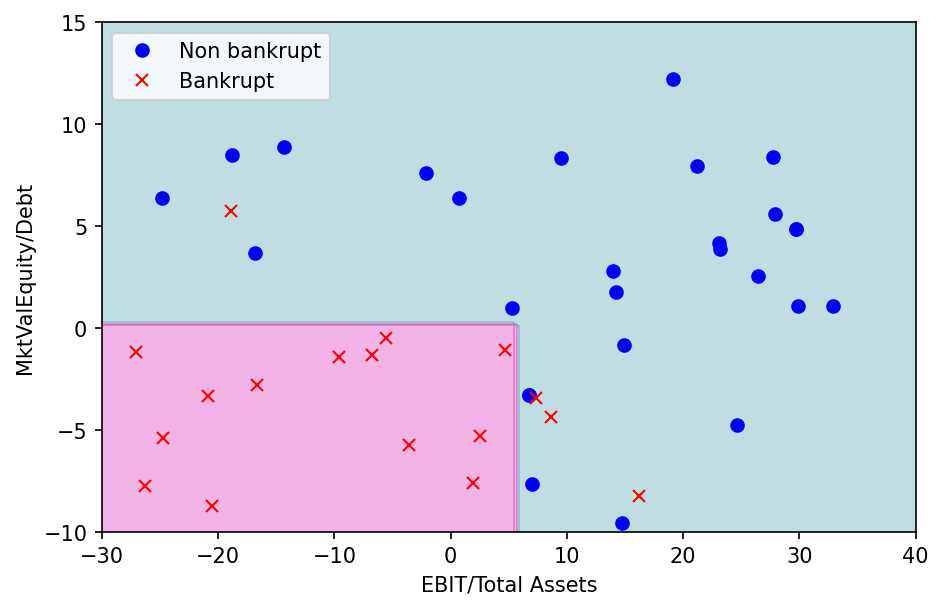

In [14]:
# Contour plot. 
from matplotlib.colors import ListedColormap
x1s = np.linspace(-30, 40, 100)
x2s = np.linspace(-10, 15, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = tree_clf.predict(X_new).astype(int).reshape(x1.shape)
custom_cmap = ListedColormap(['#2F939F','#D609A8'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
plt.plot(X['EBIT/Total Assets'][Y==False], X['MktValEquity/Debt'][Y==False], "bo",
         X['EBIT/Total Assets'][Y==True], X['MktValEquity/Debt'][Y==True], "rx")
plt.xlabel('EBIT/Total Assets')
plt.ylabel('MktValEquity/Debt')
plt.legend(['Non bankrupt','Bankrupt'])

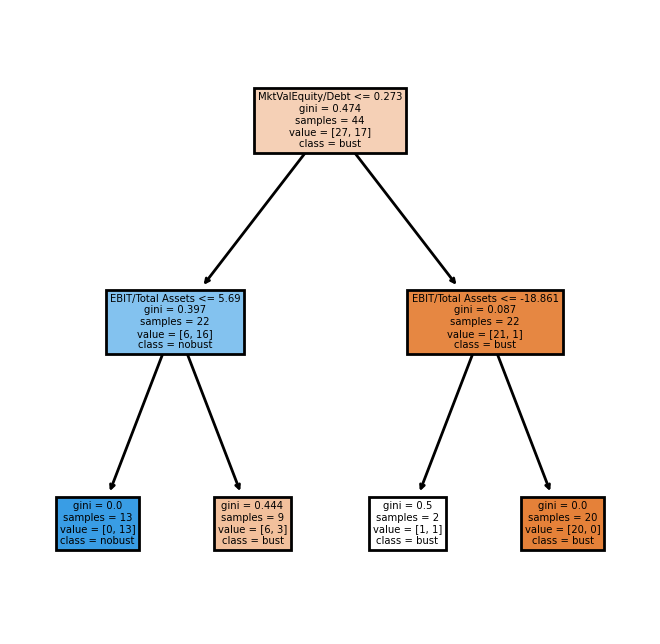

In [15]:
from sklearn import tree # Need this to see decision tree.
plt.figure(figsize=(4,4), dpi=200) # set figsize so we can see it
tree.plot_tree(tree_clf,
           feature_names = ['EBIT/Total Assets','MktValEquity/Debt'], 
           class_names=['bust', 'nobust'],
           filled = True);  # semicolon here to supress output